In [573]:
import random as r
import pandas as pd
import numpy as np


n_samples = 10000


chars = '1234567890abcdefghijk'
user_id_len = 15
user_ids = set()
while len(user_ids) < n_samples:
    s = ''.join(r.choices(chars, k=user_id_len))
    user_ids.add(s)


max_order_num = 9
order_nums = []
for _ in range(1, n_samples + 1):
    order_nums.append(r.randint(1, max_order_num))


mean = 1440
std = 200
delivery_times = np.round(np.random.normal(mean, std, n_samples), 10)



lambda_ = 1
shift = 1
total_sums = np.round(np.random.exponential(lambda_, n_samples) + shift, 3)


retention_probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
retention_numbers = [1, 2, 3, 4, 5]
retentions = np.random.choice(retention_numbers, n_samples, p=retention_probabilities)


data = pd.DataFrame({
    'user_id': list(user_ids),
    'order_num': order_nums,
    'delivery_time': delivery_times,
    'total_sum': total_sums,
    'retention': retentions
    })

data

,user_id,order_num,delivery_time,total_sum,retention
0,520f4k243hjh3ad,8,1363.168811,1.625,3
1,i3fij27242d8eh9,6,1397.070256,1.232,1
2,c3302b94fac896j,3,1346.456343,1.026,1
3,k5fjcah3044k27f,3,1383.796657,1.766,1
4,g7b3a8jag03b6dk,3,1764.143232,1.729,1
...,...,...,...,...,...
9995,9kb91f4i2e39f76,2,1237.625366,1.211,1
9996,kjf3ga3gghkf071,4,1513.621070,2.372,1
9997,731534kjeaa517k,4,1361.360042,1.089,1
9998,h538akdeja9hg6j,4,1465.652879,2.802,4


In [574]:
mean_delivery_time_data = pd.DataFrame({'mean_delivery_time': np.round(data.groupby('order_num')['delivery_time'].mean())})
merged_data = pd.merge(data, mean_delivery_time_data, on='order_num')
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time
0,520f4k243hjh3ad,8,1363.168811,1.625,3,1442.0
1,i3fij27242d8eh9,6,1397.070256,1.232,1,1438.0
2,c3302b94fac896j,3,1346.456343,1.026,1,1439.0
3,k5fjcah3044k27f,3,1383.796657,1.766,1,1439.0
4,g7b3a8jag03b6dk,3,1764.143232,1.729,1,1439.0
...,...,...,...,...,...,...
9995,9kb91f4i2e39f76,2,1237.625366,1.211,1,1441.0
9996,kjf3ga3gghkf071,4,1513.621070,2.372,1,1443.0
9997,731534kjeaa517k,4,1361.360042,1.089,1,1443.0
9998,h538akdeja9hg6j,4,1465.652879,2.802,4,1443.0


In [575]:
n_in_every_segment = 3
num_segments = (max_order_num + n_in_every_segment - 1) // n_in_every_segment
bins = [i * n_in_every_segment for i in range(num_segments + 1)]
labels = [f'{i * n_in_every_segment + 1}-{(i + 1) * n_in_every_segment}' for i in range(num_segments)]

merged_data['segment'] = pd.cut(merged_data['order_num'], bins=bins, labels=labels)
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,520f4k243hjh3ad,8,1363.168811,1.625,3,1442.0,7-9
1,i3fij27242d8eh9,6,1397.070256,1.232,1,1438.0,4-6
2,c3302b94fac896j,3,1346.456343,1.026,1,1439.0,1-3
3,k5fjcah3044k27f,3,1383.796657,1.766,1,1439.0,1-3
4,g7b3a8jag03b6dk,3,1764.143232,1.729,1,1439.0,1-3
...,...,...,...,...,...,...,...
9995,9kb91f4i2e39f76,2,1237.625366,1.211,1,1441.0,1-3
9996,kjf3ga3gghkf071,4,1513.621070,2.372,1,1443.0,4-6
9997,731534kjeaa517k,4,1361.360042,1.089,1,1443.0,4-6
9998,h538akdeja9hg6j,4,1465.652879,2.802,4,1443.0,4-6


In [576]:
total_sum_desc = pd.DataFrame(merged_data['total_sum'].describe()).T
total_sum_desc

,count,mean,std,min,25%,50%,75%,max
total_sum,10000.0,2.003729,1.002195,1.0,1.28775,1.703,2.393,10.961


In [577]:
most_frequent_total_sum = merged_data['total_sum'].value_counts()


print(f'Медиана: {total_sum_desc["50%"].values[0]}')
print(f'Мода: {most_frequent_total_sum.index[0]}; встречается {most_frequent_total_sum.iloc[0]} раз')
print(f'Среднее: {total_sum_desc["mean"].values[0]}')
print(f'Дисперсия: {np.var(merged_data["total_sum"])}')
print(f'Стандартное отклонение: {total_sum_desc["std"].values[0]}')

Медиана: 1.703
Мода: 1.007; встречается 19 раз
Среднее: 2.0037287
Дисперсия: 1.00429478149631
Стандартное отклонение: 1.0021952010553692


In [578]:
import matplotlib.pyplot as plt
merged_data

,user_id,order_num,delivery_time,total_sum,retention,mean_delivery_time,segment
0,520f4k243hjh3ad,8,1363.168811,1.625,3,1442.0,7-9
1,i3fij27242d8eh9,6,1397.070256,1.232,1,1438.0,4-6
2,c3302b94fac896j,3,1346.456343,1.026,1,1439.0,1-3
3,k5fjcah3044k27f,3,1383.796657,1.766,1,1439.0,1-3
4,g7b3a8jag03b6dk,3,1764.143232,1.729,1,1439.0,1-3
...,...,...,...,...,...,...,...
9995,9kb91f4i2e39f76,2,1237.625366,1.211,1,1441.0,1-3
9996,kjf3ga3gghkf071,4,1513.621070,2.372,1,1443.0,4-6
9997,731534kjeaa517k,4,1361.360042,1.089,1,1443.0,4-6
9998,h538akdeja9hg6j,4,1465.652879,2.802,4,1443.0,4-6


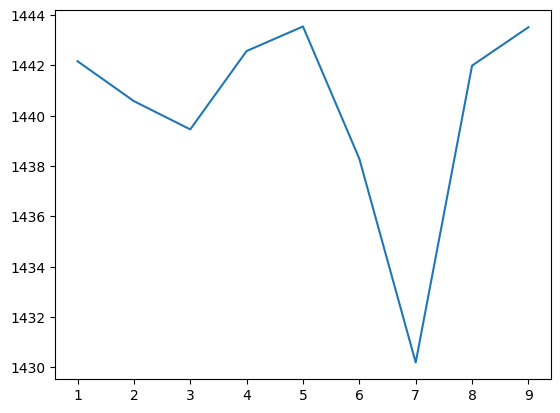

In [579]:
plt.plot(merged_data.groupby('order_num')['delivery_time'].mean())

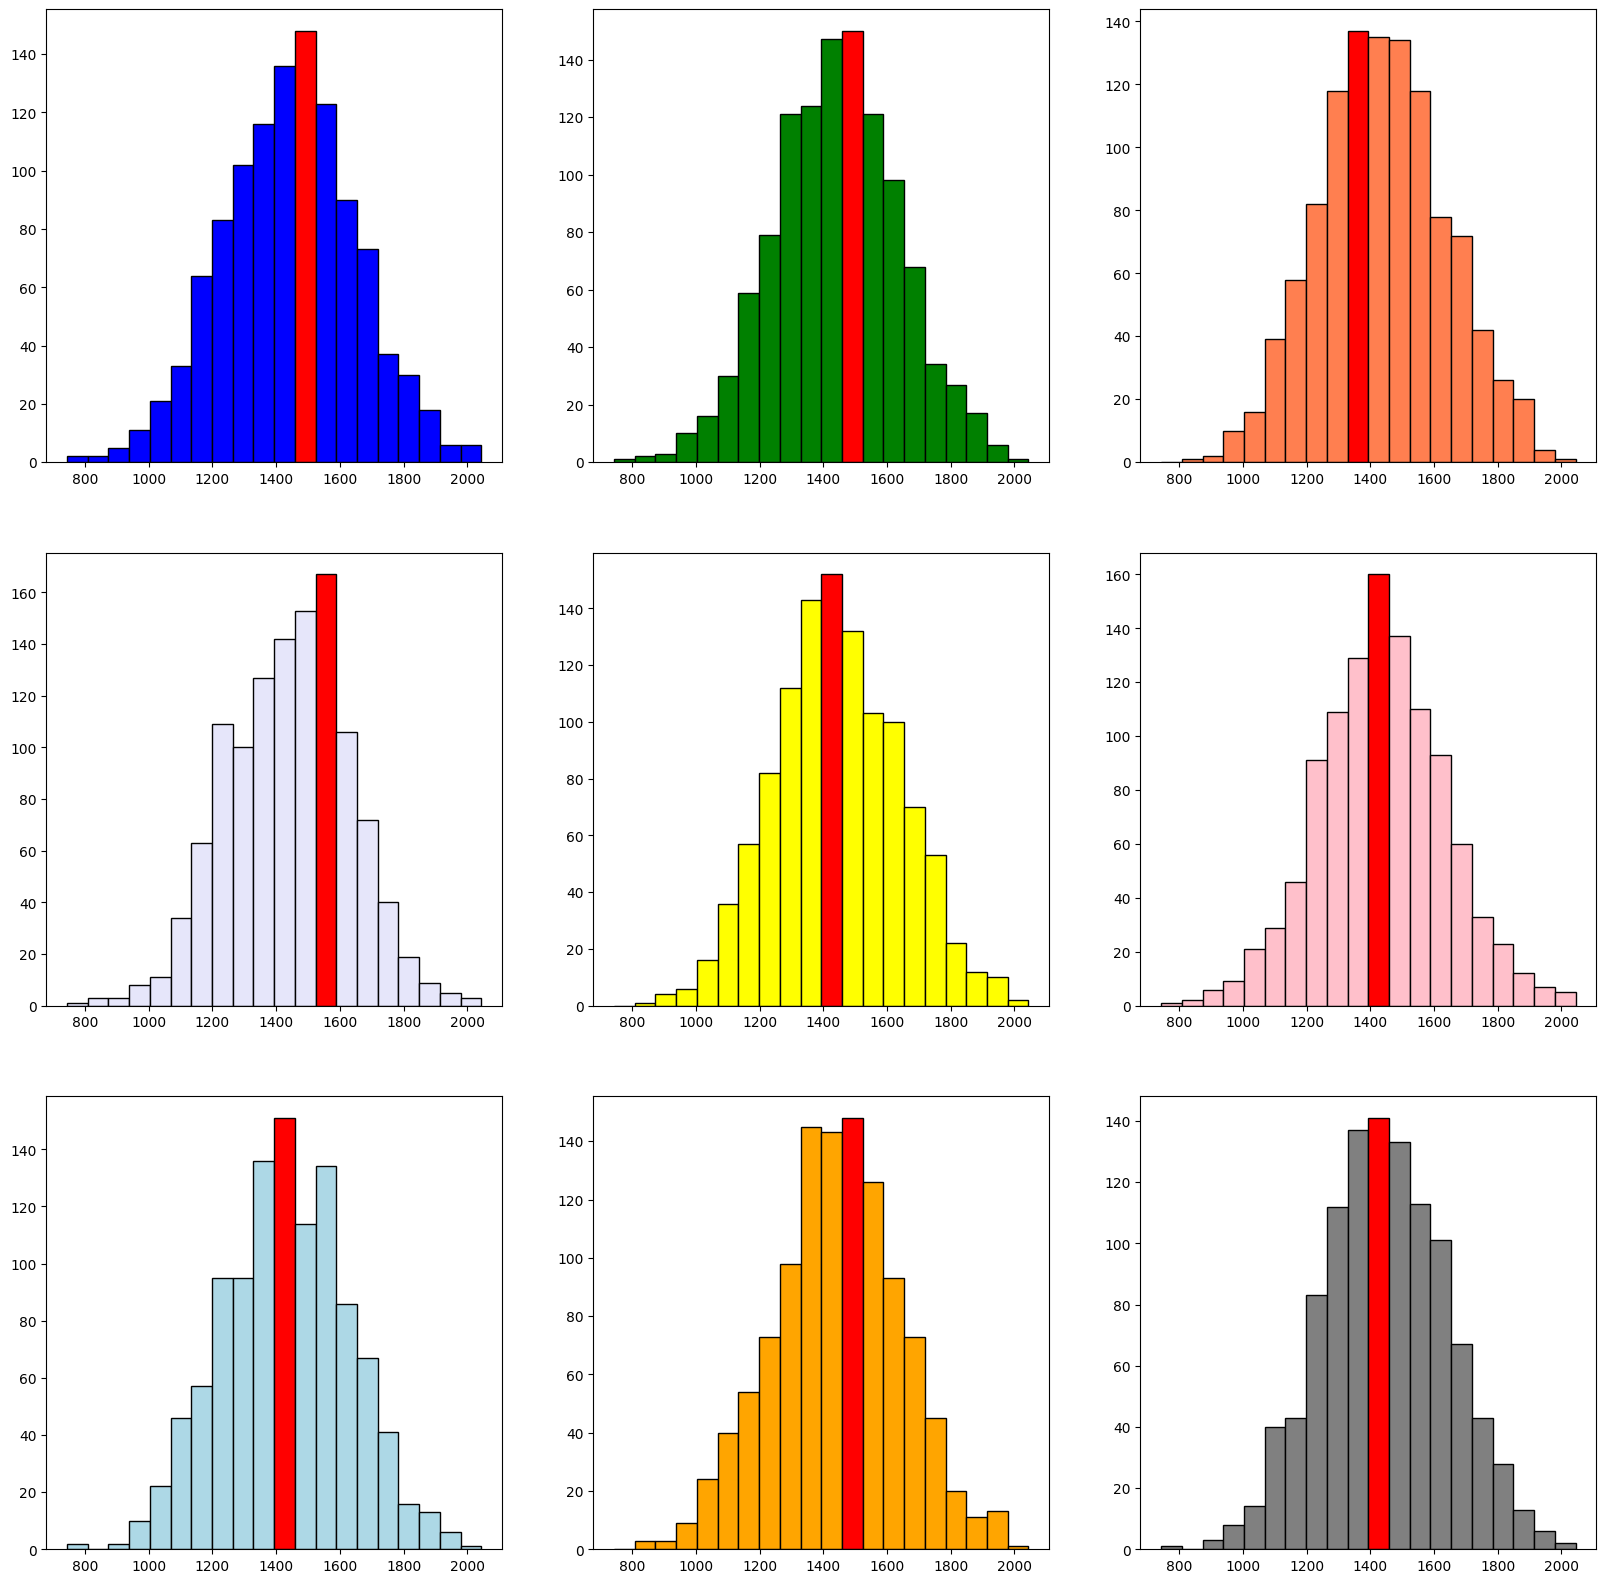

In [580]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
assert len(axs) * len(axs[0]) == max_order_num
curr_order_num = 0
bins = 20
colors = [
    "blue",
    "green",
    "coral",
    "lavender",
    "yellow",
    "pink",
    "lightblue",
    "orange",
    "gray"
]
for i in range(len(axs)):
    for j in range(len(axs[0])):
        curr_order_num += 1
        counts, bins, patches = axs[i, j].hist(merged_data[merged_data['order_num'] == curr_order_num]['delivery_time'], 
                       bins=bins, 
                       color=colors[curr_order_num - 1],
                       edgecolor='black'
                       )
        max_index = np.argmax(counts)
        patches[max_index].set_facecolor('red')
        #axs[i, j].title(f'Номер заказа {curr_order_num}')

In [587]:
from sklearn.preprocessing import MinMaxScaler

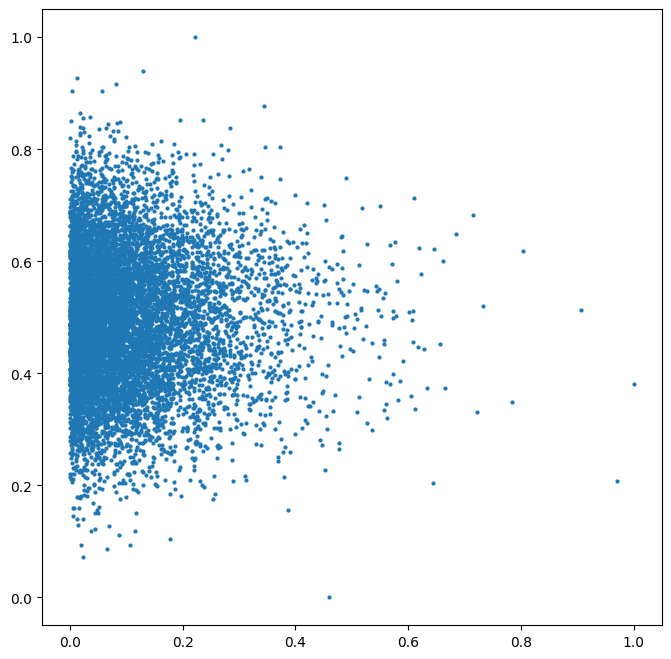

In [599]:
plt.figure(figsize=(8, 8))

# xs = range(1, 15)
# ys = range(0, 2400, 100)
# plt.xticks(xs)
# plt.yticks(ys)

x_scaler = MinMaxScaler()
scaled_total_sum = x_scaler.fit_transform(merged_data[['total_sum']])
scaled_delivery_time = x_scaler.fit_transform(merged_data[['delivery_time']])
plt.plot(scaled_total_sum, scaled_delivery_time, 'o', markersize=2)